In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [118]:
url = "https://raw.githubusercontent.com/ShreyaSaha102/Medical_Cost_Prediction/refs/heads/main/health_insurance.csv"
df = pd.read_csv(url)

In [119]:
print(df.shape)
df.head()

(15000, 11)


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,1731.7


## Deep Dive Into The Dataset

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   bloodpressure        15000 non-null  int64  
 8   diabetes             15000 non-null  int64  
 9   regular_ex           15000 non-null  int64  
 10  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB


In [121]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [122]:
print(df.isnull().sum())

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
bloodpressure            0
diabetes                 0
regular_ex               0
claim                    0
dtype: int64


In [123]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[['age','bmi']] = imputer.fit_transform(df[['age','bmi']])

In [124]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: ['sex', 'hereditary_diseases']
Numeric Columns: ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'claim']


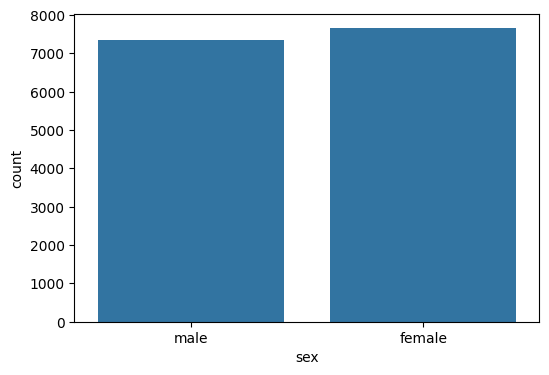

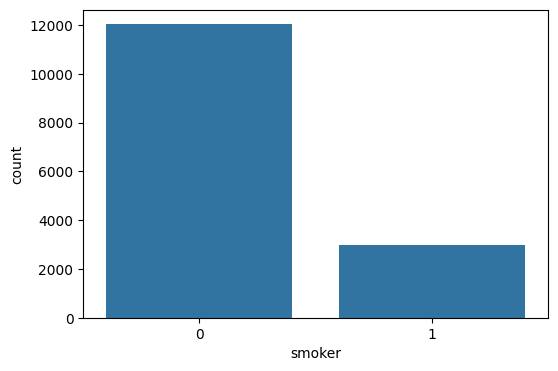

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df)
plt.show()

In [126]:
print(df.columns)

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex',
       'claim'],
      dtype='object')


In [127]:
#One Hot Encoding
categorical_cols = ['hereditary_diseases']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity
0,60.0,male,64,24.3,1,0,72,0,0,13112.6,False,False,False,False,False,False,False,True,False
1,49.0,female,75,22.6,1,0,78,1,1,9567.0,False,False,False,False,False,False,False,True,False
2,32.0,female,64,17.8,2,1,88,1,1,32734.2,False,False,False,True,False,False,False,False,False
3,61.0,female,53,36.4,1,1,72,1,0,48517.6,False,False,False,False,False,False,False,True,False
4,19.0,female,50,20.6,0,0,82,1,0,1731.7,False,False,False,False,False,False,False,True,False


In [128]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df.head()

,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity
0,60.0,1,64,24.3,1,0,72,0,0,13112.6,False,False,False,False,False,False,False,True,False
1,49.0,0,75,22.6,1,0,78,1,1,9567.0,False,False,False,False,False,False,False,True,False
2,32.0,0,64,17.8,2,1,88,1,1,32734.2,False,False,False,True,False,False,False,False,False
3,61.0,0,53,36.4,1,1,72,1,0,48517.6,False,False,False,False,False,False,False,True,False
4,19.0,0,50,20.6,0,0,82,1,0,1731.7,False,False,False,False,False,False,False,True,False


In [129]:
corr = df.corr()['claim'].sort_values(ascending=False)
print(corr)

claim                               1.000000
smoker                              0.773399
age                                 0.298063
hereditary_diseases_Diabetes        0.215687
hereditary_diseases_EyeDisease      0.209152
hereditary_diseases_Obesity         0.206206
bmi                                 0.196672
hereditary_diseases_HeartDisease    0.193000
hereditary_diseases_Cancer          0.183886
hereditary_diseases_Epilepsy        0.163929
hereditary_diseases_High BP         0.152596
hereditary_diseases_Arthritis       0.136703
diabetes                            0.135371
weight                              0.077716
no_of_dependents                    0.067614
sex                                 0.059592
bloodpressure                       0.013742
regular_ex                         -0.060492
hereditary_diseases_NoDisease      -0.572933
Name: claim, dtype: float64


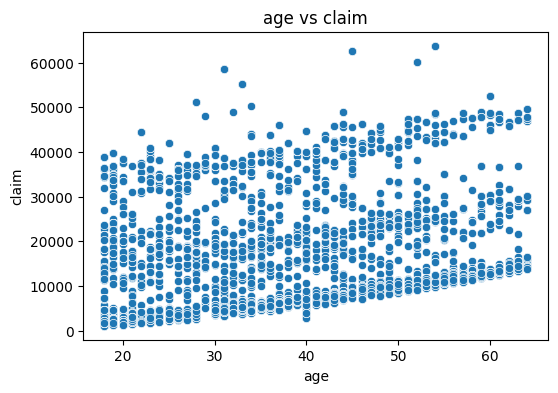

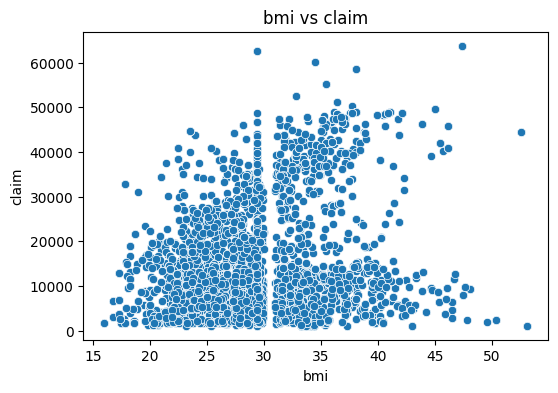

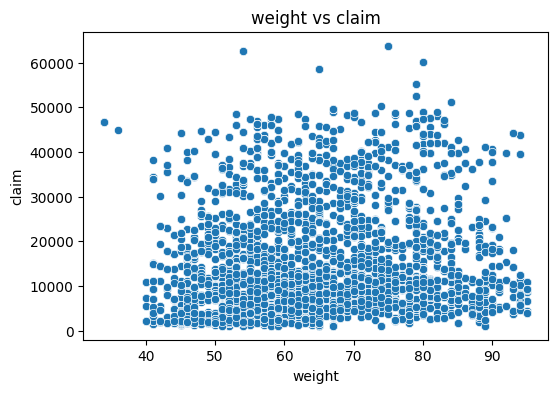

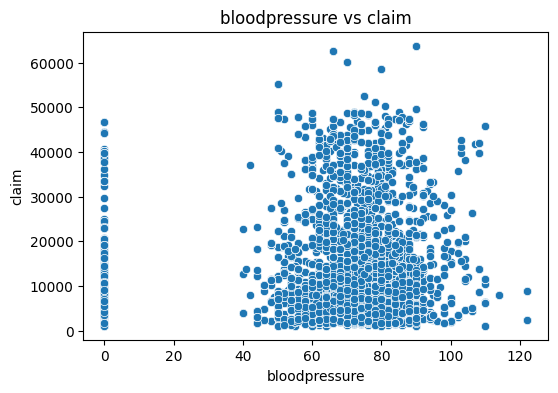

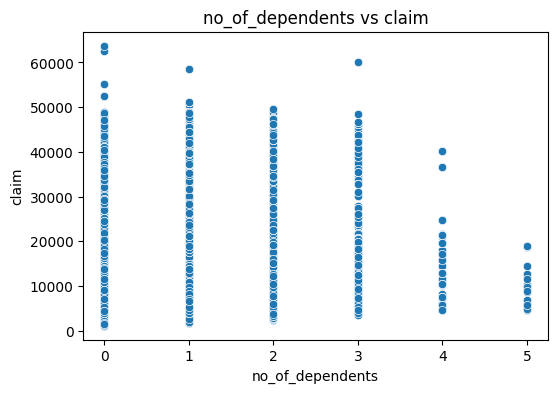

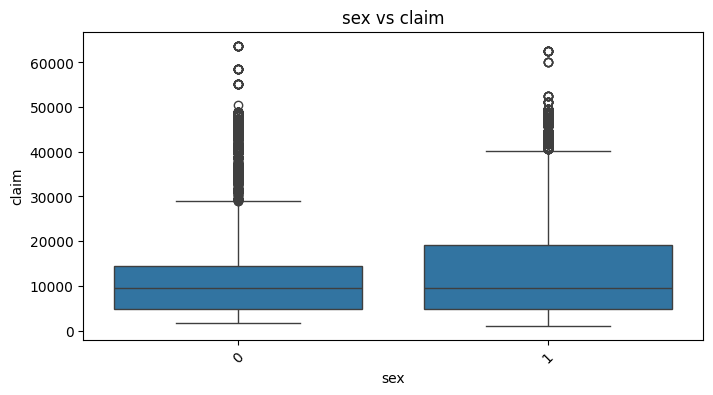

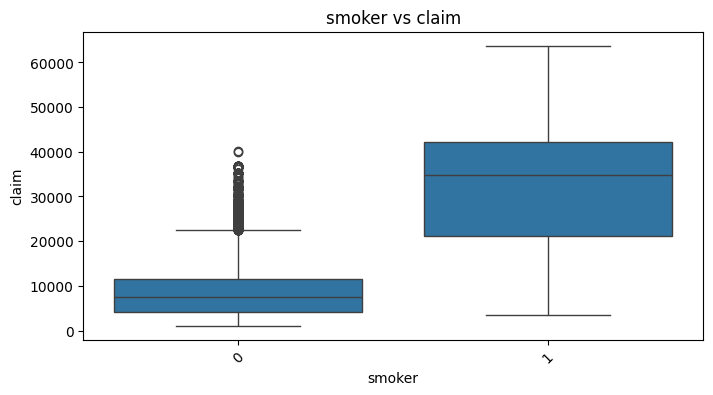

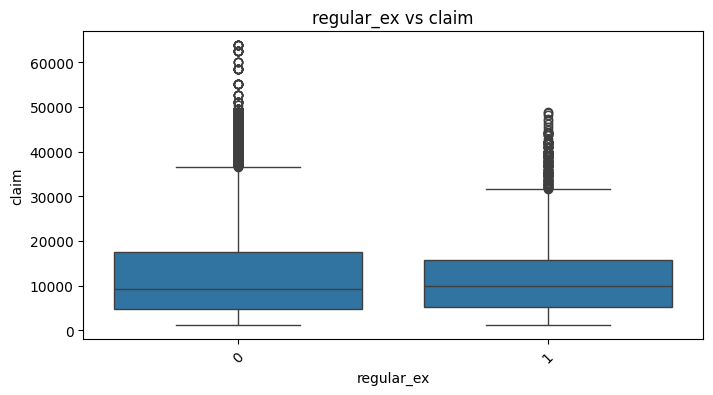

In [130]:
# For numeric variables
for col in ['age','bmi','weight','bloodpressure','no_of_dependents']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='claim', data=df)
    plt.title(f"{col} vs claim")
    plt.show()

# For categorical variables
for col in ['sex','smoker','regular_ex']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='claim', data=df)
    plt.title(f"{col} vs claim")
    plt.xticks(rotation=45)
    plt.show()


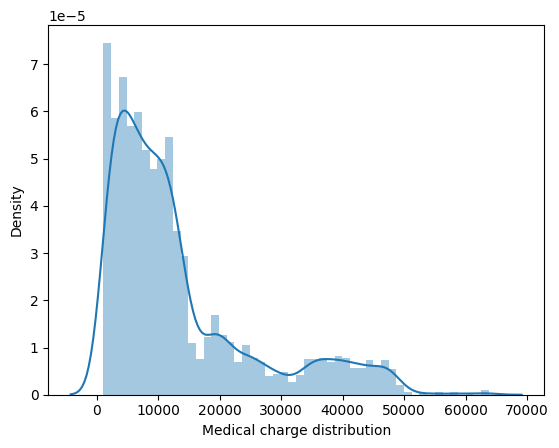

In [131]:
sns.distplot(df['claim'])
plt.xlabel("Medical charge distribution")
plt.show()

In [132]:
df.head()

,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity
0,60.0,1,64,24.3,1,0,72,0,0,13112.6,False,False,False,False,False,False,False,True,False
1,49.0,0,75,22.6,1,0,78,1,1,9567.0,False,False,False,False,False,False,False,True,False
2,32.0,0,64,17.8,2,1,88,1,1,32734.2,False,False,False,True,False,False,False,False,False
3,61.0,0,53,36.4,1,1,72,1,0,48517.6,False,False,False,False,False,False,False,True,False
4,19.0,0,50,20.6,0,0,82,1,0,1731.7,False,False,False,False,False,False,False,True,False


In [133]:
print(df.columns)

Index(['age', 'sex', 'weight', 'bmi', 'no_of_dependents', 'smoker',
       'bloodpressure', 'diabetes', 'regular_ex', 'claim',
       'hereditary_diseases_Arthritis', 'hereditary_diseases_Cancer',
       'hereditary_diseases_Diabetes', 'hereditary_diseases_Epilepsy',
       'hereditary_diseases_EyeDisease', 'hereditary_diseases_HeartDisease',
       'hereditary_diseases_High BP', 'hereditary_diseases_NoDisease',
       'hereditary_diseases_Obesity'],
      dtype='object')


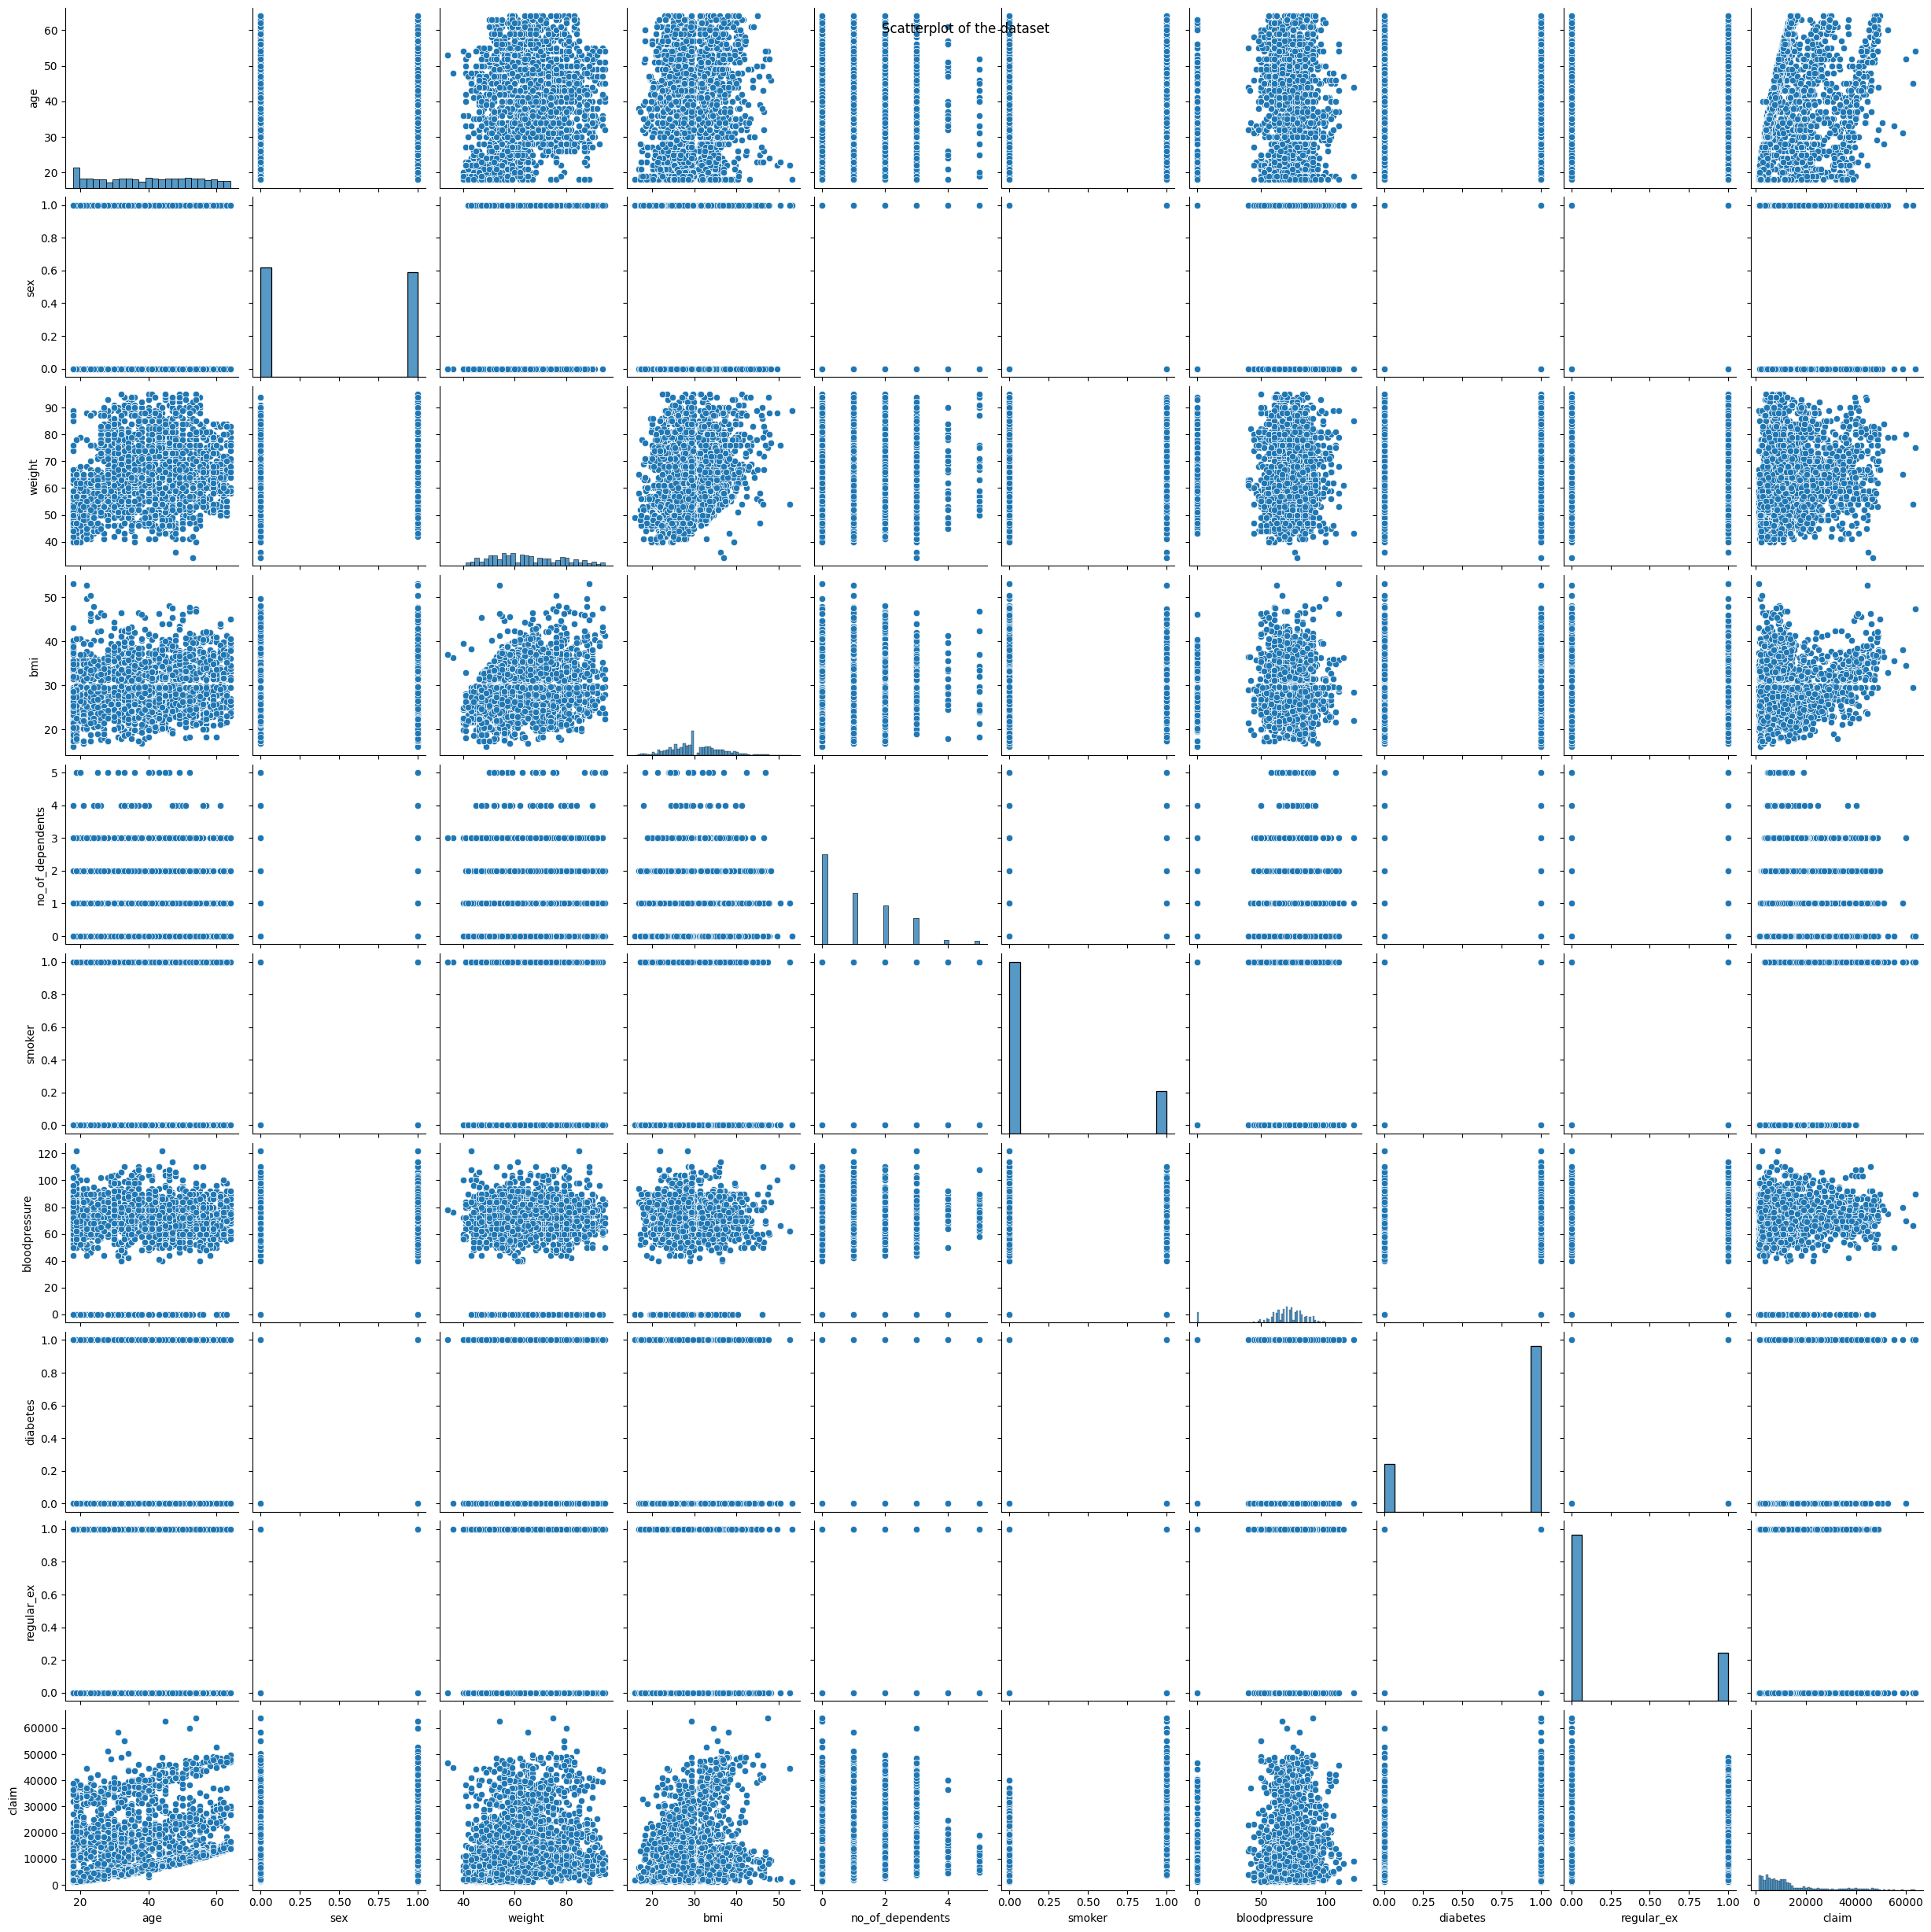

In [134]:
#ploting the data to check linearity

cols=['age','sex','weight','bmi','no_of_dependents','smoker','bloodpressure','diabetes','regular_ex','claim']
sns.pairplot(df[cols])
plt.suptitle("Scatterplot of the dataset")
plt.show()

## Fitting Models

In [135]:
#Define Features & Target
X = df.drop('claim', axis=1)
y = df['claim']

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
#Fit Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [138]:
y_pred = model.predict(X_test_scaled)

In [143]:
#Metric Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse:.2f}")
print(f"R\u00b2 Score:{r2:.4f}")
print(f'Linear Regression Adjusted R^2: {adj_r2:.4f}')

RMSE: 20921.94
R² Score:-1.9309
Linear Regression Adjusted R^2: -1.9486


In [146]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

ridge = Ridge()

# Define the parameter grid for cross-validation
param_grid = {'alpha': np.logspace(-3, 3, 50)}

#perform cross-validation
ridge_cv = GridSearchCV(ridge, param_grid, cv=5,scoring='r2')
ridge_cv.fit(X_train, y_train)

#Best alpha value
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f'Best alpha for Ridge: {best_alpha_ridge}')

# Predict on test data using the best model
y_pred_ridge = ridge_cv.predict(X_test)

# Calculate R-squared and Adjusted R-squared
mse = mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(mse)
r2_ridge = r2_score(y_test, y_pred_ridge)
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse_ridge:.2f}")
print(f'Ridge Regression R^2: {r2_ridge:.4f}')
print(f'Ridge Regression Adjusted R^2: {adj_r2_ridge:.4f}')

Best alpha for Ridge: 2.6826957952797246
RMSE: 20921.94
Ridge Regression R^2: 0.7597
Ridge Regression Adjusted R^2: 0.7583


In [147]:
# Lasso regression with cross-validation for hyperparameter tuning
lasso = Lasso(max_iter=10000)

# Define the parameter grid for cross-validation
param_grid = {'alpha': np.logspace(-3, 3, 50)}

# Perform cross-validation
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

# Best alpha value
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f'Best alpha for Lasso: {best_alpha_lasso}')

# Predict on test data using the best model
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate R-squared and Adjusted R-squared
mse = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mse)
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = 1 - (1 - r2_lasso) * (n - 1) / (n - p - 1)

print(f'RMSE: {rmse_lasso:.2f}')
print(f'Lasso Regression R^2: {r2_lasso:.4f}')
print(f'Lasso Regression Adjusted R^2: {adj_r2_lasso:.4f}')

Best alpha for Lasso: 1.151395399326447
RMSE: 20921.94
Lasso Regression R^2: 0.7597
Lasso Regression Adjusted R^2: 0.7583
